In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.optimize import minimize
from scipy import sparse
import statsmodels.base.model as base
from statsmodels.iolib import summary2
from statsmodels.genmod import families
import warnings
import statsmodels
import patsy
%matplotlib inline

Data=pd.read_csv('/Users/Juyoung/Desktop/BigdataProgramming-main/프로젝트/data/bigpro_test.csv',encoding='utf-8')
#Data=pd.read_csv('/Users/juyoung/Desktop/빅데이터프로그래밍/프로젝트/data/bigpro_test.csv',encoding='utf-8')
Data=Data[Data['OECD']=='v']
Data=Data.dropna(axis=0)
Data=Data.reset_index()
Data['working_elder']=Data['Elderly_popul']/Data['Working_age_popul']
Data

,index,Country,OECD,Real_house_price,Percentage_change_PIR,Safety,Working_age_popul,Elderly_popul,Working_hours,Unemploy_rate,Employ_rate,Gini_coff,2018_GDP,2018_GDP_Rank,Happiness_score,Happiness_score_rank,Sub,working_elder
0,0,Australia,v,102.2,8.3,63.0,65.5,15.7,1712.0,6.498750,74.275,0.325,57354.964046,10,7.272,10,0,0.239695
1,1,Austria,v,117.9,5.3,81.0,66.8,18.8,1501.0,5.333500,73.575,0.280,51478.285262,13,7.139,12,-1,0.281437
2,2,Belgium,v,106.4,3.6,70.0,64.2,18.8,1583.0,5.550000,65.300,0.258,47583.074941,17,6.927,16,-1,0.292835
3,3,Canada,v,123.4,12.1,82.0,66.7,17.2,1670.0,9.600000,74.150,0.303,46313.171371,18,7.328,7,-11,0.257871
4,4,Chile,v,111.3,6.7,48.0,68.7,11.5,1914.0,10.765000,64.125,0.460,15924.794239,45,6.476,25,-20,0.167394
5,5,Czech Republic,v,131.0,11.7,72.0,64.8,19.4,1788.0,2.558250,75.150,0.249,23415.843627,35,6.711,21,-14,0.299383
6,6,Denmark,v,114.3,4.5,84.0,64.0,19.5,1380.0,5.641750,75.050,0.264,61598.536704,9,7.555,3,-6,0.304688
7,7,Estonia,v,112.4,5.5,69.0,64.0,19.7,1711.0,6.766500,75.275,0.305,23170.707378,37,5.739,63,26,0.307812
8,8,Finland,v,101.1,1.6,85.0,62.3,21.6,1540.0,7.783250,72.975,0.269,50030.877311,14,7.632,1,-13,0.346709
9,9,France,v,106.8,3.0,71.0,62.1,19.8,1505.0,8.050000,65.550,0.301,41631.090739,23,6.489,23,0,0.318841


# Total

In [2]:
data='Happiness_score ~ Real_house_price+Percentage_change_PIR+Safety+Working_hours+Employ_rate+Gini_coff+working_elder'
y,X=dmatrices(data,Data,return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,1119.526573,Intercept
1,1.504273,Real_house_price
2,2.916818,Percentage_change_PIR
3,2.924678,Safety
4,2.992700,Working_hours
5,2.296625,Employ_rate
6,2.250984,Gini_coff
7,2.365385,working_elder


In [12]:
all_target=Data[['Happiness_score']]
all_x_data=Data[['Real_house_price','Percentage_change_PIR','Safety','Working_hours','Employ_rate','Gini_coff','working_elder']]

all_x_data=sm.add_constant(all_x_data, prepend=False)
all_glm_binom = sm.GLM(all_target, all_x_data)
res = all_glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Happiness_score   No. Observations:                   34
Model:                            GLM   Df Residuals:                       26
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                         0.18102
Method:                          IRLS   Log-Likelihood:                -14.628
Date:                Tue, 27 Apr 2021   Deviance:                       4.7066
Time:                        14:20:07   Pearson chi2:                     4.71
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Real_house_price         -0.01

In [13]:
all_x_data.corr()

,Real_house_price,Percentage_change_PIR,Safety,Working_hours,Employ_rate,Gini_coff,working_elder,const
Real_house_price,1.000000,0.504609,0.039303,-0.073003,0.281441,-0.214465,-0.134501,NaN
Percentage_change_PIR,0.504609,1.000000,0.227143,-0.066840,0.416478,-0.197435,-0.503136,NaN
Safety,0.039303,0.227143,1.000000,-0.739282,0.591994,-0.617166,0.297550,NaN
Working_hours,-0.073003,-0.066840,-0.739282,1.000000,-0.589429,0.610047,-0.430626,NaN
Employ_rate,0.281441,0.416478,0.591994,-0.589429,1.000000,-0.350119,0.153790,NaN
Gini_coff,-0.214465,-0.197435,-0.617166,0.610047,-0.350119,1.000000,-0.387232,NaN
working_elder,-0.134501,-0.503136,0.297550,-0.430626,0.153790,-0.387232,1.000000,NaN
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


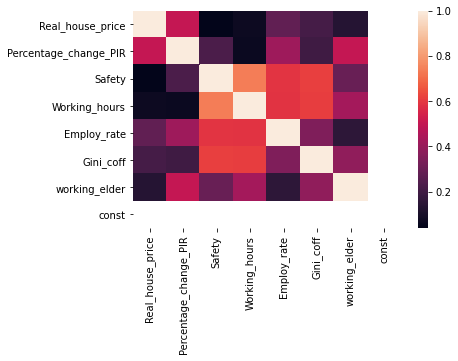

In [15]:
sns.heatmap(np.abs(all_x_data.corr()))

plt.show()

# Unhappy

In [16]:
unhappy_data=Data[Data['Sub']>0]
happy_data=Data[Data['Sub']<0]
same_data=Data[Data['Sub']==0]
unhappy_data=unhappy_data.sort_values(by='Sub')
happy_data=happy_data.sort_values(by='Sub')
same_data=same_data.sort_values(by='Sub')

In [17]:
data='Happiness_score ~ Real_house_price+Percentage_change_PIR+Safety+Working_hours+Employ_rate+Gini_coff+working_elder'
y,X=dmatrices(data,unhappy_data,return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,1525.473525,Intercept
1,1.767837,Real_house_price
2,3.073535,Percentage_change_PIR
3,2.296876,Safety
4,2.016808,Working_hours
5,1.658319,Employ_rate
6,1.247948,Gini_coff
7,2.222998,working_elder


In [18]:
all_target=unhappy_data[['Happiness_score']]
all_unhappy_data=unhappy_data[['Real_house_price','Percentage_change_PIR','Safety','Working_hours','Employ_rate','Gini_coff','working_elder']]

all_unhappy_data=sm.add_constant(all_unhappy_data, prepend=False)
all_glm_binom = sm.GLM(all_target, all_unhappy_data)
res = all_glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Happiness_score   No. Observations:                   14
Model:                            GLM   Df Residuals:                        6
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                         0.25250
Method:                          IRLS   Log-Likelihood:                -4.2996
Date:                Tue, 27 Apr 2021   Deviance:                       1.5150
Time:                        14:24:29   Pearson chi2:                     1.51
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Real_house_price         -0.01

In [36]:
all_unhappy_data.corr()

,Real_house_price,Percentage_change_PIR,Safety,Working_hours,Employ_rate,Gini_coff,working_elder,const
Real_house_price,1.000000,0.385386,-0.010708,-0.281565,0.212157,-0.304631,-0.176679,NaN
Percentage_change_PIR,0.385386,1.000000,0.403801,-0.057267,0.208116,-0.100452,-0.700585,NaN
Safety,-0.010708,0.403801,1.000000,-0.510274,0.457488,-0.248354,-0.197584,NaN
Working_hours,-0.281565,-0.057267,-0.510274,1.000000,-0.529816,0.264155,-0.117688,NaN
Employ_rate,0.212157,0.208116,0.457488,-0.529816,1.000000,-0.076908,0.079791,NaN
Gini_coff,-0.304631,-0.100452,-0.248354,0.264155,-0.076908,1.000000,0.006316,NaN
working_elder,-0.176679,-0.700585,-0.197584,-0.117688,0.079791,0.006316,1.000000,NaN
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


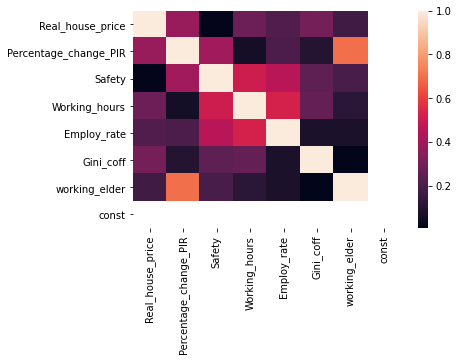

In [19]:
sns.heatmap(np.abs(all_unhappy_data.corr()))

plt.show()

# Happy

In [21]:
data='Happiness_score ~ Real_house_price+Percentage_change_PIR+Working_hours+Employ_rate+Gini_coff+working_elder'
y,X=dmatrices(data,happy_data,return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,1387.357428,Intercept
1,3.730393,Real_house_price
2,4.665260,Percentage_change_PIR
3,4.931211,Working_hours
4,5.086846,Employ_rate
5,3.957849,Gini_coff
6,5.523839,working_elder


In [22]:
all_target=happy_data[['Happiness_score']]
all_happy_data=happy_data[['Real_house_price','Percentage_change_PIR','Safety','Working_hours','Employ_rate','Gini_coff','working_elder']]

all_happy_data=sm.add_constant(all_happy_data, prepend=False)
all_glm_binom = sm.GLM(all_target, all_happy_data)
res = all_glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Happiness_score   No. Observations:                   17
Model:                            GLM   Df Residuals:                        9
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                         0.11511
Method:                          IRLS   Log-Likelihood:               -0.33990
Date:                Tue, 27 Apr 2021   Deviance:                       1.0360
Time:                        14:26:09   Pearson chi2:                     1.04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Real_house_price         -0.01

In [23]:
all_happy_data.corr()

,Real_house_price,Percentage_change_PIR,Safety,Working_hours,Employ_rate,Gini_coff,working_elder,const
Real_house_price,1.000000,0.813712,0.067321,-0.013032,0.529184,-0.194787,-0.130295,NaN
Percentage_change_PIR,0.813712,1.000000,0.174658,-0.033675,0.504905,-0.187427,-0.244261,NaN
Safety,0.067321,0.174658,1.000000,-0.849426,0.746921,-0.820704,0.698335,NaN
Working_hours,-0.013032,-0.033675,-0.849426,1.000000,-0.709093,0.725962,-0.765634,NaN
Employ_rate,0.529184,0.504905,0.746921,-0.709093,1.000000,-0.587492,0.490286,NaN
Gini_coff,-0.194787,-0.187427,-0.820704,0.725962,-0.587492,1.000000,-0.757063,NaN
working_elder,-0.130295,-0.244261,0.698335,-0.765634,0.490286,-0.757063,1.000000,NaN
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


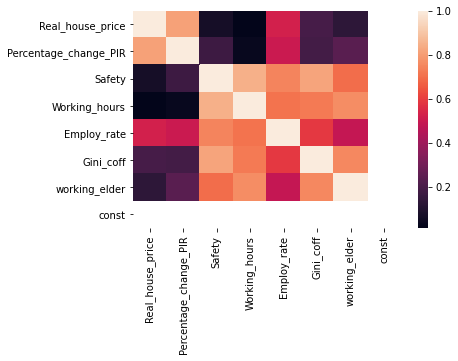

In [24]:
sns.heatmap(np.abs(all_happy_data.corr()))

plt.show()